<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_Molecular_Biology_Genetic/blob/lesson2/GB_molecular_Biology_Genetics_Task_2_dirty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 2. От гена до белка
В таблицу гена, полученную по итогам практического задания первого урока, добавьте следующую информацию: аминокислотную последовательность, количество транскриптов, количество аминокислот для самой длинной изоформы белка.

Сделанное практическое задание предоставляется в формате .ipynb.

https://colab.research.google.com/drive/1YF3b8bJ-3-Wjso2KOtvmj-QB2UhEZNJQ

In [ ]:
!pip install biopython -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from Bio import Entrez
from Bio import SeqIO
from Bio.Seq import MutableSeq
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [ ]:
# dis = pd.read_table('https://github.com/nedokormysh/GB_intro_Molecular_Biology_Genetic/raw/lesson1/curated_gene_disease_associations_june_4_2020.tsv.gz')
# # dis = dis[['geneId',	'geneSymbol',	'DSI',	'DPI',	'diseaseId',	'diseaseName',	'diseaseType',	'diseaseClass']]
# dis.head()

Загрузим таблицу для всех генов, которую получили на прошлом занятии.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nedokormysh/GB_intro_Molecular_Biology_Genetic/lesson1/gene_info.csv')
df.head()

,geneId,geneSymbol,start,end,gi_id,strand,chrom_num,mapLoc,ID chromosome,gene lenght,gene
0,790,CAD,27217369,27243943,568815596,plus,2,2p23.3,NC_000002.12,26574,GTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCCG...
1,1723,DHODH,72008744,72027659,568815582,plus,16,16q22.2,NC_000016.10,18915,GGCTTAATGACGGAAGGAGCATGGCGTGGAGACACCTGAAAGTGAG...
2,2056,EPO,100720468,100723700,568815591,plus,7,7q22.1,NC_000007.14,3232,CTTTCCCAGATAGCACGCTCCGCCAGTCCCAAGGGTGCGCAACCGG...
3,3040,HBA2,172876,173710,568815582,plus,16,16p13.3,NC_000016.10,834,CTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTGT...
4,3043,HBB,5225464,5227071,568815587,minus,11,11p15.4,NC_000011.10,1607,TGCAATGAAAATAAATGTTTTTTATTAGGCAGAATCCAGATGCTCA...


Требуется работать только с одним геном. Оставим одну запись в таблице.

In [ ]:
df = df.iloc[[0]]
# df = df.iloc[0]
# df = df.reset_index(drop=True)
df.T

,0
geneId,790
geneSymbol,CAD
start,27217369
end,27243943
gi_id,568815596
strand,plus
chrom_num,2
mapLoc,2p23.3
ID chromosome,NC_000002.12
gene lenght,26574


In [ ]:
df['gene'][0]

'GTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCCGCGCCCGGCTTCTCTCCAGCGCCCCGCGCCGTTAGCCACGTGGACCGACTCCGGCGCGCCGTCCTCACGTGGTTCCAGTGGAGTTTGCAGTCCTTCCCGCTTCTCCGTACTCGCCCCCGCCTCTGAGCTCCCTTCCCATGGCGGCCCTAGTGTTGGAGGACGGGTCGGTCCTGCGGGGCCAGCCCTTTGGGGCCGCCGTGTCGACTGCCGGGGAAGTGGGTAAGCAAGCCCGGTTAGGCTGCAGACCTTATCCCACTCTGTGATGCGCCTCTCCTCCCAACCTTCCCCGTCCAGACCCCGCCATTTTCCCGCCAGCGTACCCCCTTCCCCCATTCGGTGCCCATGGGCCCCAGCGCCATAAACCCCTCGCGACCAAGGCAGCCTCCACTGGGGCGTGCTCATCGCGCGGGGAGTGTTCCGAAGGGTGCCCTACCGGAGCCCAGCCCTGCTTCTTTCTTGCAGTGTTTCAAACCGGCATGGTCGGCTACCCCGAGGCCCTCACTGATCCCTCCTACAAGGCACAGATCTTAGTGCTCACCTATCCTCTGATCGGCAACTATGGCATCCCCCCAGATGAAATGGATGAGTTCGGTCTCTGCAAGGTAGCCACACCCAGTGCTTTCTCTACATTCCTTTTCAAGTCAGTAATTGTTAACTATTAGTGAAGTAGGAGACGTTGACACCCTGCTGGGCATCCTGCAGAAAACATACCCACTGAAGTAGTAAAGTCAAGGACTAAGATCACTAGTAACTGTAGTTAGGGGTTGTTAAGTGCCTTGGGAGGCACAGAGTGTTGGAGGCCTCAGGAAAAAGCTACCGCCTTTGTTAAGGGCATCAAGGCTCCAGGTATAGCTGAAAGCATTCTGTATGTAGTGAAGGCATGGATCAAGGAAAAGTAAAAGAGGTGTAAGGGAACAGCCTTGTCCAACTTGTTAGGCATGCAGAAGTCAGGAG

In [ ]:
# lst_gene = df['gene'] 
seq_gene = Seq(df['gene'][0]) # создаём из нашей строки последовательность
# seq_rec = SeqRecord(Seq(seq_gene), id=str(df['geneId']), name=df['geneSymbol'],)
#     # description=fasta_string_name) # запись последовательности с дополнительной аннотацией, включая идентификатор, имя и описание.
# seq_rec

seq_gene

Seq('GTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCCGCGCCCGGC...TAA')

In [ ]:
# SeqIO.write(lst_gene, 'lst_gene.fna', 'fasta')

In [ ]:
# fasta_string = 'ACCTGTGGCTGCTTGCTTGCTTGGGCT'
# Seq(fasta_string) 

# rec = SeqRecord(
#     Seq(fasta_string),
#     id='',
#     name='',
#     description=fasta_string_name)

# rec = SeqIO.parse(fasta_string, "fasta")

# print (rec[0])

Это последовательность на смысловой цепи ДНК. Необходимо посмотреть её на матричной цепи. Для этого нам нужна комплиментраная последовательность. Также необходимо учитывать направление цепи ДНК. В данном случае, оно положительное, но проверим, иначе нам потребуется обратнокомплиментарная последовательность.

Если знак плюс, то последовательность на смысловой цепи ДНК. И нам нужно просто перевести её в комлиментарную. 
Если знак минус, то последовательность на матричной (транкрибируемой) цепи.

In [ ]:
def wright_way_compliment(seq_gene, strand):
  # if strand == 'plus':
  #   seq_gene = seq_gene.complement()
  # else:
  #   seq_gene = seq_gene.reverse_complement()
  
  seq_gene = seq_gene.complement() if strand == 'plus' else seq_gene.reverse_complement().complement()

  return seq_gene

In [ ]:
df['strand'][0]

In [ ]:
wright_way_compliment(seq_gene, 'minus')

Seq('TTAACACGCTCCTGCCGAGTCCCAAAGAGTCACGAGTGTGAAAATGCCGAGTGT...GAC')

In [ ]:
#Nucleotide sequences and (reverse) complements



Seq('CAGAGACGACGACGGCGGTTCGCGCGGGCTCCGAGGATGCGACGGCGCGGGCCG...ATT')

In [ ]:
# my_dna = Seq("AGTACACTGGT")
# print(my_dna)
# # print(my_dna.complement())
# print(my_dna.reverse_complement().complement())

# # my_dna_rev = Seq("TGGTCACATGTA")

Теперь можем произвести транскрибцию, т.е. переведём последовательность ДНК в РНК.

In [ ]:
m_rna = seq_gene.transcribe()
m_rna

Seq('GUCUCUGCUGCUGCCGCCAAGCGCGCCCGAGGCUCCUACGCUGCCGCGCCCGGC...UAA')

Теперь произведем трансляцию РНК в белок. Требуется найти первой вхождение 'AUG' в последовательность.

In [ ]:
m_rna_start = str(m_rna).partition('AUG')
m_rna_start_translation = ''.join(m_rna_start[1::])
print(m_rna_start_translation)
print(len(m_rna_start_translation))

AUGGCGGCCCUAGUGUUGGAGGACGGGUCGGUCCUGCGGGGCCAGCCCUUUGGGGCCGCCGUGUCGACUGCCGGGGAAGUGGGUAAGCAAGCCCGGUUAGGCUGCAGACCUUAUCCCACUCUGUGAUGCGCCUCUCCUCCCAACCUUCCCCGUCCAGACCCCGCCAUUUUCCCGCCAGCGUACCCCCUUCCCCCAUUCGGUGCCCAUGGGCCCCAGCGCCAUAAACCCCUCGCGACCAAGGCAGCCUCCACUGGGGCGUGCUCAUCGCGCGGGGAGUGUUCCGAAGGGUGCCCUACCGGAGCCCAGCCCUGCUUCUUUCUUGCAGUGUUUCAAACCGGCAUGGUCGGCUACCCCGAGGCCCUCACUGAUCCCUCCUACAAGGCACAGAUCUUAGUGCUCACCUAUCCUCUGAUCGGCAACUAUGGCAUCCCCCCAGAUGAAAUGGAUGAGUUCGGUCUCUGCAAGGUAGCCACACCCAGUGCUUUCUCUACAUUCCUUUUCAAGUCAGUAAUUGUUAACUAUUAGUGAAGUAGGAGACGUUGACACCCUGCUGGGCAUCCUGCAGAAAACAUACCCACUGAAGUAGUAAAGUCAAGGACUAAGAUCACUAGUAACUGUAGUUAGGGGUUGUUAAGUGCCUUGGGAGGCACAGAGUGUUGGAGGCCUCAGGAAAAAGCUACCGCCUUUGUUAAGGGCAUCAAGGCUCCAGGUAUAGCUGAAAGCAUUCUGUAUGUAGUGAAGGCAUGGAUCAAGGAAAAGUAAAAGAGGUGUAAGGGAACAGCCUUGUCCAACUUGUUAGGCAUGCAGAAGUCAGGAGAAAAAAGCCUGCAGAUAAGUUAAAUCCGGUGGGCAUGGAGGGACCUGAAGCCAAAGCAGAGUCAGCUUAGUUUGGUAAAGGAUCCAUUGAAGGUUUUUUUUUAGCAGCAGAGUCAGAUGGGAGCAGUGCUUUUUAGGACUACAUAAAUUAGUGGAAAGAGACUGGAAACUAGGGUCACAUACU

In [ ]:
protein_x = Seq(m_rna_start_translation).translate()
protein_x

Seq('MAALVLEDGSVLRGQPFGAAVSTAGEVGKQARLGCRPYPTL*CASPPNLPRPDP...SVL')

In [ ]:
start_codon_index = str(m_rna).find('AUG')
protein_seq_ = m_rna[start_codon_index:]
protein_seq_

Seq('AUGGCGGCCCUAGUGUUGGAGGACGGGUCGGUCCUGCGGGGCCAGCCCUUUGGG...UAA')

In [ ]:
len(protein_seq_)

26392

In [ ]:
protein = protein_seq_.translate()
protein

Seq('MAALVLEDGSVLRGQPFGAAVSTAGEVGKQARLGCRPYPTL*CASPPNLPRPDP...SVL')

In [ ]:
len(protein)

8797

In [ ]:
# Добавим последовательность белка в таблицу
df['prot.seq.example'] = str(protein)

In [ ]:
df.T

,0
geneId,790
geneSymbol,CAD
start,27217369
end,27243943
gi_id,568815596
strand,plus
chrom_num,2
mapLoc,2p23.3
ID chromosome,NC_000002.12
gene lenght,26574


Необходимо найти количество транскриптов.

На официальном сайте предлагается поискать раздел нуклеотидов для белка в базе gene.


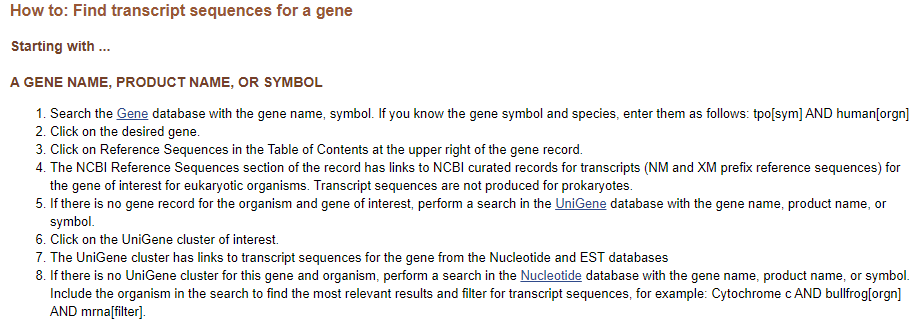

In [ ]:
import xml.etree.ElementTree as ET
handle = Entrez.efetch(db="gene", id="790", rettype = 'xml') # получаем данные о выбранном гене (база, id, тип поиска)
# gene_locus = ET.parse(handle).getroot().find("Entrezgene/Entrezgene_locus") # парсим данные локуса, где лежит этот ген
# region = gene_locus.find("Gene-commentary/Gene-commentary_seqs/Seq-loc/Seq-loc_int/Seq-interval") # парсим регион, где лежит этот ген
# start = int(region.find("Seq-interval_from").text) + 1
# end = int(region.find("Seq-interval_to").text) + 1
# gi_id = region.find("Seq-interval_id/Seq-id/Seq-id_gi").text
# strand = region.find("Seq-interval_strand/Na-strand").get("value")
# print(start, end, gi_id, strand)

27217369 27243943 568815596 plus


In [ ]:
# Entrez.read(handle)

In [ ]:
handle = Entrez.esummary(db="gene", id=790, rettype = 'xml')
record = Entrez.read(handle)

In [ ]:
record

{'DocumentSummarySet': DictElement({'DocumentSummary': [DictElement({'Name': 'CAD', 'Description': 'carbamoyl-phosphate synthetase 2, aspartate transcarbamylase, and dihydroorotase', 'Status': '0', 'CurrentID': '0', 'Chromosome': '2', 'GeneticSource': 'genomic', 'MapLocation': '2p23.3', 'OtherAliases': 'CDG1Z, DEE50, EIEE50, GATD4', 'OtherDesignations': 'CAD protein|CAD trifunctional protein|multifunctional protein CAD', 'NomenclatureSymbol': 'CAD', 'NomenclatureName': 'carbamoyl-phosphate synthetase 2, aspartate transcarbamylase, and dihydroorotase', 'NomenclatureStatus': 'Official', 'Mim': ['114010'], 'GenomicInfo': [{'ChrLoc': '2', 'ChrAccVer': 'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '27243942', 'ExonCount': '45'}], 'GeneWeight': '8014', 'Summary': 'The de novo synthesis of pyrimidine nucleotides is required for mammalian cells to proliferate. This gene encodes a trifunctional protein which is associated with the enzymatic activities of the first 3 enzymes in the 6-step p

In [ ]:
{'DocumentSummarySet': DictElement({'DocumentSummary': [DictElement({'Name': 'CAD', 'Description': 'carbamoyl-phosphate synthetase 2, aspartate transcarbamylase, and dihydroorotase', 'Status': '0', 'CurrentID': '0', 'Chromosome': '2', 'GeneticSource': 'genomic', 'MapLocation': '2p23.3', 'OtherAliases': 'CDG1Z, DEE50, EIEE50, GATD4', 
                                                                     'OtherDesignations': 'CAD protein|CAD trifunctional protein|multifunctional protein CAD', 'NomenclatureSymbol': 'CAD', 'NomenclatureName': 'carbamoyl-phosphate synthetase 2, aspartate transcarbamylase, and dihydroorotase', 'NomenclatureStatus': 'Official', 'Mim': ['114010'], 
                                                                     'GenomicInfo': [{'ChrLoc': '2', 'ChrAccVer': 'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '27243942', 'ExonCount': '45'}], 'GeneWeight': '8014',
                                                                     'Summary': 'The de novo synthesis of pyrimidine nucleotides is required for mammalian cells to proliferate.
                                                                      This gene encodes a trifunctional protein which is associated with the enzymatic activities of the first 3 enzymes in the 6-step pathway of pyrimidine biosynthesis:
                                                                      carbamoylphosphate synthetase (CPS II), aspartate transcarbamoylase, and dihydroorotase. This protein is regulated by the mitogen-activated protein kinase (MAPK) cascade, which indicates a direct link between activation
                                                                      of the MAPK cascade and de novo biosynthesis of pyrimidine nucleotides. Alternative splicing results in multiple transcript variants encoding different isoforms. [provided by RefSeq, Apr 2015]', 'ChrSort': '02', 
                                                                      'ChrStart': '27217368', 'Organism': {'ScientificName': 'Homo sapiens', 'CommonName': 'human', 'TaxID': '9606'}, 'LocationHist': [{'AnnotationRelease': 'RS_2023_03', 'AssemblyAccVer': 'GCF_000001405.40', 'ChrAccVer':
                                                                     'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '27243942'}, {'AnnotationRelease': 'RS_2023_03', 'AssemblyAccVer': 'GCF_009914755.1', 'ChrAccVer': 'NC_060926.1', 'ChrStart': '27259007', 'ChrStop': '27285578'},
                                                                      {'AnnotationRelease': '110', 'AssemblyAccVer': 'GCF_000001405.40', 'ChrAccVer': 'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '27243942'}, {'AnnotationRelease': '110', 'AssemblyAccVer': 'GCF_009914755.1',
                                                                        'ChrAccVer': 'NC_060926.1', 'ChrStart': '27259007', 'ChrStop': '27285578'},
                                                                         {'AnnotationRelease': '109.20211119', 'AssemblyAccVer': 'GCF_000001405.39', 'ChrAccVer': 'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '2724394
                                                                         'AnnotationRelease': '109.20210514', 'AssemblyAccVer': 'GCF_000001405.39', 'ChrAccVer': 'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '27243942'},
                                                                          {'AnnotationRelease': '109.20210226', 'AssemblyAccVer': 'GCF_000001405.39', 'ChrAccVer': 'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '27243942'}, 
                                                                           {'AnnotationRelease': '109.20201120', 'AssemblyAccVer': 'GCF_000001405.39', 'ChrAccVer': 'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '27243942'},
                                                                            {'AnnotationRelease': '109.20200815', 'AssemblyAccVer': 'GCF_000001405.39', 'ChrAccVer': 'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '27243942'},
                                                                             {'AnnotationRelease': '109.20200522', 'AssemblyAccVer': 'GCF_000001405.39', 'ChrAccVer': 'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '27243942'},
                                                                    {'AnnotationRelease': '109.20200228', 'AssemblyAccVer': 'GCF_000001405.39', 'ChrAccVer': 'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '27243942'},
                                                                     {'AnnotationRelease': '109.20191205', 'AssemblyAccVer': 'GCF_000001405.39', 'ChrAccVer': 'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '27243942'},
                                                                      {'AnnotationRelease': '109.20190905', 'AssemblyAccVer': 'GCF_000001405.39', 'ChrAccVer': 'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '27243942'},
                                                                       {'AnnotationRelease': '109.20190607', 'AssemblyAccVer': 'GCF_000001405.39', 'ChrAccVer': 'NC_000002.12', 'ChrStart': '27217368', 'ChrStop': '27243942'},
                                                                        {'AnnotationRelease': '105.20220307', 'AssemblyAccVer': 'GCF_000001405.25', 'ChrAccVer': 'NC_000002.11', 'ChrStart': '27440236', 'ChrStop': '27466810'},
                                                                         {'AnnotationRelease': '105.20201022', 'AssemblyAccVer': 'GCF_000001405.25', 'ChrAccVer': 'NC_000002.11', 'ChrStart': '27440236', 'ChrStop': '27466810'},
                                                                          {'AnnotationRelease': '105', 'AssemblyAccVer': 'GCF_000001405.25', 'ChrAccVer': 'NC_000002.11', 'ChrStart': '27440257', 'ChrStop': '27466659'},
                                                                           {'AnnotationRelease': '105', 'AssemblyAccVer': 'GCF_000002125.1', 'ChrAccVer': 'AC_000134.1', 'ChrStart': '27181963', 'ChrStop': '27208359'},
                                                                            {'AnnotationRelease': '105', 'AssemblyAccVer': 'GCF_000306695.2', 'ChrAccVer': 'NC_018913.2', 'ChrStart': '27370162', 'ChrStop': '27396558'}]},
                                                                     attributes={'uid': '790'})], 
                                    'DbBuild': 'Build230531-2035m.1'}, attributes={'status': 'OK'})}

In [ ]:
from Bio import Entrez
Entrez.email = 'A.N.Other@example.com'
handle = Entrez.esearch(db="nuccore", term='tpo[CAD] AND human[orgn]', rettype="fasta", retmode="text")
record = handle.read()

In [ ]:
# Получаем список транскрипций по имени гена из базы `nuccore` 
handle = Entrez.esearch(db="nucleotide", #id=790,
                        term='CAD[Gene name] AND 790 AND Homo sapiens"[Organism] AND RefSeq[Keyword]',
                        # usehistory="y",
                        retmax=30)
record = Entrez.read(handle)
handle.close()
record

{'Count': '9', 'RetMax': '9', 'RetStart': '0', 'IdList': ['240255695', '2462577005', '2462577003', '2217330917', '2217330915', '2194974903', '2194974693', '568815597', '568815596'], 'TranslationSet': [{'From': 'Homo sapiens', 'To': '"Homo sapiens"[Organism] OR Homo sapiens[All Fields]'}], 'TranslationStack': [{'Term': 'CAD[Gene name]', 'Field': 'Gene name', 'Count': '32556', 'Explode': 'N'}, {'Term': '790[All Fields]', 'Field': 'All Fields', 'Count': '262240', 'Explode': 'N'}, 'AND', {'Term': '"Homo sapiens"[Organism]', 'Field': 'Organism', 'Count': '28444712', 'Explode': 'Y'}, {'Term': 'Homo sapiens[All Fields]', 'Field': 'All Fields', 'Count': '60699394', 'Explode': 'N'}, 'OR', 'GROUP', {'Term': 'Organism[All Fields]', 'Field': 'All Fields', 'Count': '24014000', 'Explode': 'N'}, 'AND', 'GROUP', 'AND', {'Term': 'RefSeq[Keyword]', 'Field': 'Keyword', 'Count': '96019288', 'Explode': 'N'}, 'AND'], 'QueryTranslation': 'CAD[Gene name] AND 790[All Fields] AND (("Homo sapiens"[Organism] OR H

In [ ]:
transcript_id_list = record['IdList']
transcript_id_list

['240255695', '2462577005', '2462577003', '2217330917', '2217330915', '2194974903', '2194974693', '568815597', '568815596']

In [ ]:
handle = Entrez.efetch(db="nuccore",
                           id=2462577003,
                           rettype = 'gb',
                           retmode = 'text')
info = SeqIO.read(handle, 'gb')
info

SeqRecord(seq=Seq('AGTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCCGCGCCCGG...TAA'), id='XM_054343840.1', name='XM_054343840', description='PREDICTED: Homo sapiens carbamoyl-phosphate synthetase 2, aspartate transcarbamylase, and dihydroorotase (CAD), transcript variant X1, mRNA', dbxrefs=['BioProject:PRJNA807723'])

In [140]:
handle = Entrez.esearch(
  db="nuccore", term="Human[Orgn] AND CAD[Gene name]", 
  idtype="acc"
  )
record = Entrez.read(handle)
record["IdList"]

['NM_001258406.2', 'NG_046726.2', 'XM_054343841.1', 'XM_054343840.1', 'XM_054374915.1', 'XM_054334795.1', 'XM_054334794.1', 'XR_008485943.1', 'XM_054334793.1', 'XM_054334792.1', 'XR_008485942.1', 'XR_008485941.1', 'XM_006712101.4', 'XM_047445803.1', 'XM_047430581.1', 'XM_011540865.3', 'XM_017000500.2', 'XR_946565.2', 'XM_017000499.2', 'XM_017000498.3']

In [ ]:
# from Bio import Entrez
# Entrez.email = "A.N.Other@example.com"  # Always tell NCBI who you are
# handle = Entrez.efetch(db="nucleotide", term="CAD[Gene]", rettype="gb", retmode="text")
# print(handle.read())

In [ ]:
def get_transcriptions_info(transcript_id_list):
  transcript_info = []
  for i in transcript_id_list:
    handle = Entrez.efetch(db="nuccore",
                           id=i,
                           rettype = 'gb',
                           retmode = 'text')
    info = SeqIO.read(handle, 'gb')
    if str(info.name).find('NC') and str(info.name).find('NG'):
      transcript_info.append({'id':info.id, 'name':info.name})
    # print(info.name)
    # print(info.seq)
  return transcript_info

In [ ]:
transcriptions_list = get_transcriptions_info(transcript_id_list)

In [ ]:
for transcript in transcriptions_list:
  print(transcript)

{'id': 'XM_054343841.1', 'name': 'XM_054343841'}
{'id': 'XM_054343840.1', 'name': 'XM_054343840'}
{'id': 'XM_006712101.4', 'name': 'XM_006712101'}
{'id': 'XM_047445803.1', 'name': 'XM_047445803'}


In [ ]:
record

b'<?xml version="1.0" encoding="UTF-8" ?>\n<!DOCTYPE eSearchResult PUBLIC "-//NLM//DTD esearch 20060628//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20060628/esearch.dtd">\n<eSearchResult><Count>267</Count><RetMax>20</RetMax><RetStart>0</RetStart><IdList>\n<Id>1677501090</Id>\n<Id>341865614</Id>\n<Id>1732746132</Id>\n<Id>183074517</Id>\n<Id>1890295337</Id>\n<Id>1889465113</Id>\n<Id>1889426982</Id>\n<Id>1696246601</Id>\n<Id>253735811</Id>\n<Id>253735749</Id>\n<Id>237858802</Id>\n<Id>2462592187</Id>\n<Id>2462576596</Id>\n<Id>2462576594</Id>\n<Id>2462576592</Id>\n<Id>2462576590</Id>\n<Id>2462576588</Id>\n<Id>2462576586</Id>\n<Id>2462576584</Id>\n<Id>2462576582</Id>\n</IdList><TranslationSet><Translation>     <From>human[orgn]</From>     <To>"Homo sapiens"[Organism]</To>    </Translation></TranslationSet><TranslationStack>   <TermSet>    <Term>tpo[All Fields]</Term>    <Field>All Fields</Field>    <Count>2737</Count>    <Explode>N</Explode>   </TermSet>   <TermSet>    <Term>"Homo sapie

In [ ]:
a = [1677501090, 341865614, 1732746132, 183074517, 1890295337, 1889465113, 1889426982, 1696246601, 253735811, 253735749, 237858802, 2462592187, 2462576596, 2462576594, 
2462576592, 2462576590, 2462576588, 2462576586, 2462576584, 2462576582]

In [ ]:
len(a)

20

In [176]:
# Получаем список транскрипций по имени гена из базы `nuccore` 
handle = Entrez.esearch(db="protein", #id=790,
                        term='CAD[Gene Name] AND "790"[entrezID] AND "human"[Organism] AND RefSeq[Keyword]', idtype="acc",
                        # usehistory="y",
                        retmax=30)
record = Entrez.read(handle)
handle.close()
record

{'Count': '6', 'RetMax': '6', 'RetStart': '0', 'IdList': ['XP_054199816.1', 'XP_054199815.1', 'XP_047301759.1', 'XP_006712164.1', 'NP_001293008.1', 'NP_004332.2'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'CAD[Gene Name]', 'Field': 'Gene Name', 'Count': '31264', 'Explode': 'N'}, {'Term': '"790"[All Fields]', 'Field': 'All Fields', 'Count': '1535958', 'Explode': 'N'}, 'AND', {'Term': '"human"[Organism]', 'Field': 'Organism', 'Count': '1899197', 'Explode': 'Y'}, 'AND', {'Term': 'RefSeq[Keyword]', 'Field': 'Keyword', 'Count': '262603938', 'Explode': 'N'}, 'AND'], 'QueryTranslation': 'CAD[Gene Name] AND "790"[All Fields] AND "human"[Organism] AND RefSeq[Keyword]', 'ErrorList': {'FieldNotFound': ['entrezID'], 'PhraseNotFound': []}}

In [177]:
len(record['IdList'])

6

In [ ]:
transcript_id_list = record['IdList']
transcript_id_list

['1653960876', '2302519871', '2462577005', '2462577003', '2462537864', '2462505449', '2462505447', '2462505446', '2462505444', '2462505442', '2462505441', '2462505440', '2217330917', '2217330915', '2217294955', '2217264611', '2217264610', '2217264609', '2217264608', '2217264607', '2217264606', '2217264605', '2194974903', '2194974693', '2194973193', '568815597', '568815596', '568815585', '1890254436', '1889482617']

In [ ]:
def get_transcriptions_info(transcript_id_list):
  transcript_info = []
  for i in transcript_id_list:
    handle = Entrez.efetch(db="nuccore",
                           id=i,
                           rettype = 'gb',
                           retmode = 'text')
    info = SeqIO.read(handle, 'gb')
    if str(info.name).find('NC') and str(info.name).find('NG'):
      transcript_info.append({'id':info.id, 'name':info.name})
    # print(info.name)
    # print(info.seq)
  return transcript_info

In [ ]:
transcriptions_list = get_transcriptions_info(transcript_id_list)

In [ ]:
for transcript in transcriptions_list:
  print(transcript)
  # print('=' * 200)

{'id': 'NM_001258406.2', 'name': 'NM_001258406'}
{'id': 'XM_054343841.1', 'name': 'XM_054343841'}
{'id': 'XM_054343840.1', 'name': 'XM_054343840'}
{'id': 'XM_054374915.1', 'name': 'XM_054374915'}
{'id': 'XM_054334795.1', 'name': 'XM_054334795'}
{'id': 'XM_054334794.1', 'name': 'XM_054334794'}
{'id': 'XR_008485943.1', 'name': 'XR_008485943'}
{'id': 'XM_054334793.1', 'name': 'XM_054334793'}
{'id': 'XM_054334792.1', 'name': 'XM_054334792'}
{'id': 'XR_008485942.1', 'name': 'XR_008485942'}
{'id': 'XR_008485941.1', 'name': 'XR_008485941'}
{'id': 'XM_006712101.4', 'name': 'XM_006712101'}
{'id': 'XM_047445803.1', 'name': 'XM_047445803'}
{'id': 'XM_047430581.1', 'name': 'XM_047430581'}
{'id': 'XM_011540865.3', 'name': 'XM_011540865'}
{'id': 'XM_017000500.2', 'name': 'XM_017000500'}
{'id': 'XR_946565.2', 'name': 'XR_946565'}
{'id': 'XM_017000499.2', 'name': 'XM_017000499'}
{'id': 'XM_017000498.3', 'name': 'XM_017000498'}
{'id': 'XR_002959574.2', 'name': 'XR_002959574'}
{'id': 'XR_946563.3', 'nam

In [ ]:
XR_946565.2

## Для другого.

In [ ]:
# Получаем список транскрипций по имени гена из базы `nuccore`
handle = Entrez.esearch(db="nuccore",
                        term='FGFR2[Gene Name] AND "homo sampiens"[Organism] AND RefSeq[Keyword]',
                        # usehistory="y",
                        retmax=30)
record = Entrez.read(handle)
handle.close()
record

{'Count': '38', 'RetMax': '30', 'RetStart': '0', 'IdList': ['2324154561', '1890284386', '1889443442', '1677539445', '1677531698', '394025691', '222144232', '222144230', '2462517776', '2462517774', '2462517772', '2462517770', '2462517768', '2462517766', '2462517764', '2462517762', '2462517760', '2462517758', '2462517756', '2217276108', '2217276107', '2217276106', '2217276105', '2217276104', '2217276103', '2217276102', '2217276101', '2217276100', '2217276099', '2217276098'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'FGFR2[Gene Name]', 'Field': 'Gene Name', 'Count': '4955', 'Explode': 'N'}, {'Term': '"homo sampiens"[Organism]', 'Field': 'Organism', 'Count': '28444712', 'Explode': 'Y'}, 'AND', {'Term': 'RefSeq[Keyword]', 'Field': 'Keyword', 'Count': '96019288', 'Explode': 'N'}, 'AND'], 'QueryTranslation': 'FGFR2[Gene Name] AND "homo sampiens"[Organism] AND RefSeq[Keyword]'}

In [ ]:
len(record['IdList'])

30

In [ ]:
transcript_id_list = record['IdList']
transcript_id_list

['2324154561', '1890284386', '1889443442', '1677539445', '1677531698', '394025691', '222144232', '222144230', '2462517776', '2462517774', '2462517772', '2462517770', '2462517768', '2462517766', '2462517764', '2462517762', '2462517760', '2462517758', '2462517756', '2217276108', '2217276107', '2217276106', '2217276105', '2217276104', '2217276103', '2217276102', '2217276101', '2217276100', '2217276099', '2217276098']

In [ ]:
# Выгрузим информацию обо всех транскрипциях гена из `transcript_id_list` 
def get_transcriptions_info(transcript_id_list):
  transcript_info = []
  for i in transcript_id_list:
    handle = Entrez.efetch(db="nuccore",
                           id=i,
                           rettype = 'gb',
                           retmode = 'text')
    info = SeqIO.read(handle, 'gb')
    if str(info.name).find('NC') and str(info.name).find('NG'):
      transcript_info.append({'id':info.id, 'name':info.name})
    # print(info.name)
    # print(info.seq)
  return transcript_info

In [ ]:
transcriptions_list = get_transcriptions_info(transcript_id_list)

In [ ]:
for transcript in transcriptions_list:
  print(transcript)
  # print('=' * 200)

{'id': 'NM_022970.4', 'name': 'NM_022970'}
{'id': 'NM_001320654.2', 'name': 'NM_001320654'}
{'id': 'NM_001144916.2', 'name': 'NM_001144916'}
{'id': 'NM_001144918.2', 'name': 'NM_001144918'}
{'id': 'NM_001144917.2', 'name': 'NM_001144917'}
{'id': 'NM_023029.2', 'name': 'NM_023029'}
{'id': 'NM_001144914.1', 'name': 'NM_001144914'}
{'id': 'NM_001144913.1', 'name': 'NM_001144913'}
{'id': 'XM_054365174.1', 'name': 'XM_054365174'}
{'id': 'XM_054365173.1', 'name': 'XM_054365173'}
{'id': 'XM_054365172.1', 'name': 'XM_054365172'}
{'id': 'XM_054365171.1', 'name': 'XM_054365171'}
{'id': 'XM_054365170.1', 'name': 'XM_054365170'}
{'id': 'XM_054365169.1', 'name': 'XM_054365169'}
{'id': 'XM_054365168.1', 'name': 'XM_054365168'}
{'id': 'XM_054365167.1', 'name': 'XM_054365167'}
{'id': 'XM_054365166.1', 'name': 'XM_054365166'}
{'id': 'XM_054365165.1', 'name': 'XM_054365165'}
{'id': 'XM_054365164.1', 'name': 'XM_054365164'}
{'id': 'XM_017015925.3', 'name': 'XM_017015925'}
{'id': 'XM_017015924.3', 'name':

## ещё

In [ ]:
item = 'ATK1'
animal = 'Homo sapien' 
search_string = item+"[Gene] AND "+animal+"[Organism] AND mRNA[Filter] AND RefSeq[Filter]"

In [ ]:
handle = Entrez.esearch(db="nucleotide", term=search_string)
record = Entrez.read(handle)
ids = record['IdList']

In [ ]:
ids

[]

In [ ]:
seq_id = ids[0] #you must implement an if to deal with <0 or >1 cases
handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
record = handle.read()

IndexError: ignored